**Domain:** F & B   **Function:** Marketing  
`CodeX` is a German beverage company that is aiming to make its mark in the **Indian market.** A few months ago, they launched their energy drink in 10 cities in India.
Their Marketing team is responsible for increasing 
- brand awareness, 
- market share,
- product development.  

Survey was conducted in 10 cities and received results from 10k respondents.  
As a marketing data analyst we are tasked to convert these survey results to meaningful insights which the team can use to drive actions.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', 70)

In [5]:
# read the data from the csv files

cities = pd.read_csv('./Dataset/dim_cities.csv')
respondents = pd.read_csv('./Dataset/dim_repondents.csv')
survey = pd.read_csv('./Dataset/fact_survey_responses.csv')


In [6]:
cities.sort_values(['Tier','City'])

,City_ID,City,Tier
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
0,CT111,Delhi,Tier 1
5,CT116,Hyderabad,Tier 1
1,CT112,Mumbai,Tier 1
6,CT117,Ahmedabad,Tier 2
8,CT119,Jaipur,Tier 2
4,CT115,Kolkata,Tier 2
9,CT120,Lucknow,Tier 2
7,CT118,Pune,Tier 2


Tier 1 cities: Bangalore, Chennai, Delhi, Hyderabad, Mumbai  
Tier 2 cities: Ahmedabad, Jaipur, Kolkata, Lucknow, Pune

In [7]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
respondents.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [9]:
[print("Unique values in Column - {}: ".format(col),respondents[col].nunique()) for col in respondents.columns]

Unique values in Column - Respondent_ID:  10000
Unique values in Column - Name:  9487
Unique values in Column - Age:  5
Unique values in Column - Gender:  3
Unique values in Column - City_ID:  10


[None, None, None, None, None]

In [10]:
survey.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [11]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [12]:
[print("Unique values in Column - {}: ".format(col),survey[col].nunique()) for col in survey.columns]

Unique values in Column - Response_ID:  10000
Unique values in Column - Respondent_ID:  10000
Unique values in Column - Consume_frequency:  5
Unique values in Column - Consume_time:  4
Unique values in Column - Consume_reason:  5
Unique values in Column - Heard_before:  2
Unique values in Column - Brand_perception:  3
Unique values in Column - General_perception:  4
Unique values in Column - Tried_before:  2
Unique values in Column - Taste_experience:  5
Unique values in Column - Reasons_preventing_trying:  5
Unique values in Column - Current_brands:  7
Unique values in Column - Reasons_for_choosing_brands:  5
Unique values in Column - Improvements_desired:  5
Unique values in Column - Ingredients_expected:  4
Unique values in Column - Health_concerns:  2
Unique values in Column - Interest_in_natural_or_organic:  3
Unique values in Column - Marketing_channels:  5
Unique values in Column - Packaging_preference:  5
Unique values in Column - Limited_edition_packaging:  3
Unique values in 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
# create a dataframe that has information from all the tables
df = respondents.merge(cities, how='inner', on='City_ID').merge(survey, how='inner', on='Respondent_ID')

For taste related experience of our brand, we should have the entries where 'Tried_before' == Yes. Because the rating given by someone who didn't taste our energy drink doesn't make sense as they might give just 1 or even high 5.

In [14]:
df

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120055,Umang Sarkar,31-45,Non-binary,CT117,Ahmedabad,Tier 2,103025,Once a week,Before exercise,To enhance sports performance,Yes,Neutral,Effective,Yes,3,Not available locally,Cola-Coka,Availability,Healthier alternatives,Sugar,No,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Studying/working late
2,120057,Kanav Thaman,19-30,Male,CT117,Ahmedabad,Tier 2,103027,Daily,Before exercise,To boost performance,No,Neutral,Healthy,No,2,Not interested in energy drinks,Gangster,Taste/flavor preference,Reduced sugar content,Sugar,No,Not Sure,TV commercials,Innovative bottle design,No,50-99,Online retailers,Sports/exercise
3,120078,Suhana Ramakrishnan,19-30,Female,CT117,Ahmedabad,Tier 2,103048,Rarely,Before exercise,To enhance sports performance,No,Neutral,Dangerous,No,3,Health concerns,Others,Taste/flavor preference,Wider range of flavors,Guarana,Yes,Yes,TV commercials,Other,Not Sure,100-150,Supermarkets,Sports/exercise
4,120098,Saira Sridhar,19-30,Male,CT117,Ahmedabad,Tier 2,103068,Daily,Throughout the day,Other,No,Neutral,Effective,No,4,Health concerns,Blue Bull,Brand reputation,More natural ingredients,Sugar,Yes,No,TV commercials,Compact and portable cans,Yes,100-150,Other,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,129864,Ahana Cherian,19-30,Male,CT111,Delhi,Tier 1,112834,Daily,Before exercise,Increased energy and focus,Yes,Neutral,Not sure,No,3,Other,Gangster,Effectiveness,Healthier alternatives,Sugar,Yes,No,Online ads,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
9996,129903,Saanvi Bose,31-45,Female,CT111,Delhi,Tier 1,112873,2-3 times a month,Before exercise,To combat fatigue,Yes,Neutral,Dangerous,No,3,Not interested in energy drinks,Bepsi,Availability,Other,Caffeine,Yes,No,Online ads,Eco-friendly design,Yes,50-99,Local stores,Social outings/parties
9997,129944,Rhea Mani,31-45,Male,CT111,Delhi,Tier 1,112914,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Effective,No,3,Not available locally,Bepsi,Other,More natural ingredients,Caffeine,Yes,Not Sure,Online ads,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9998,129956,Rhea D’Alia,31-45,Female,CT111,Delhi,Tier 1,112926,2-3 times a week,For mental alertness,Increased energy and focus,Yes,Neutral,Dangerous,No,5,Unfamiliar with the brand,Gangster,Brand reputation,More natural ingredients,Vitamins,No,Not Sure,TV commercials,Compact and portable cans,Not Sure,50-99,Supermarkets,Social outings/parties


#### First of all lets see how many people currently consume/prefer our drink and how is the distribution across the cities.

In [15]:
df.Current_brands.value_counts()

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

Less than **10%** of respondents prefer our brand, hence the necessity to perform the market analysis and try to improve the sales for the product.

In [16]:
# Respondents distribution from different cities.
#df.groupby('City').agg(['count'])['Current_brands']

In [17]:
#city_brand = df.groupby(['City', 'Current_brands']).agg(['count'])[['Respondent_ID']]

In [19]:
# city_brand.reset_index().groupby('City').apply(lambda x: x.sort_values(('Respondent_ID','count'),\
#                                                                       ascending=False) )

Cola-Coka, Bepsi are top brands in all the cities.

### Primary Insights

### 1. Demographic Insights (examples)
    

#####    a. Who prefers energy drink more? (male/female/non-binary?)
    

In [60]:
df.Gender.value_counts()

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

`Male` consume the energy drink more. Around 60% consumption

In [26]:
# ## People can prefer a drink but they can consume rarely.

# df[~(df.Consume_frequency == 'Rarely')].Gender.value_counts()
# df[~(df.Consume_frequency == 'Rarely')].Gender.value_counts()/df.Gender.value_counts() 

In [27]:
# ## heard before
# df[~((df.Heard_before == 'No') & (df.Tried_before == 'Yes'))]

In [28]:
# df.Tried_before.value_counts()

In [29]:
# df[df.Tried_before == 'No'].Reasons_preventing_trying.value_counts()

In [30]:
# df.Reasons_preventing_trying.value_counts()

In [31]:
# df[(df.Current_brands == 'CodeX') & (df.Heard_before == 'Yes') & (df.Tried_before == 'Yes')].Price_range.value_counts()

In [32]:
# df[df.Price_range == '100-150']

#####    b. Which age group prefers energy drinks more?

In [155]:
df.Age.value_counts()

19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

'19-30' age group consumes energy drinks more accounting for 55%. After 30 years there is less likely a person prefers drinks.

#####    c. Which type of marketing reaches the most Youth (15-30)?

In [33]:
df.loc[df.Age.isin(['15-18','19-30']), 'Marketing_channels'].value_counts()

Online ads            3373
TV commercials        1785
Outdoor billboards     702
Other                  702
Print media            446
Name: Marketing_channels, dtype: int64

`Online ads and TV commercials` are the best ways to reach to youth who are major consumers for the energy drinks.

### 2. Consumer Preferences:
    

#### a. What are the preferred ingredients of energy drinks among respondents?

In [72]:
df.Ingredients_expected.value_counts()

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

`Caffeine and Vitamins` are preferred by the respondents.

In [34]:
# interest in organic ingredients
df.Interest_in_natural_or_organic.value_counts()

Yes         4983
No          3062
Not Sure    1955
Name: Interest_in_natural_or_organic, dtype: int64

Majority are interested in `Organic ingredients`

In [35]:
df.Improvements_desired.value_counts()

Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: Improvements_desired, dtype: int64

Consumer preference: Organic ingredients with less sugar content in an energy drink.

#### b. What packaging preferences do respondents have for energy drinks?

In [73]:
df.Packaging_preference.value_counts()

Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: Packaging_preference, dtype: int64

`Compact and portable cans`, `Innovative bottle design` are preferred more. Lots of respondents didn't consider **Eco-friendly design** (but its better to have this) along with one of above. The age group of 15-30 is generally expected to have energy draining schedule because of either attending to schools, colleges and athletic events, excercise activities etc.,. so they need something compact and easy to carry.

In [36]:
df.Limited_edition_packaging.value_counts()

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

In [47]:
# df.groupby(['Tier','Limited_edition_packaging']).Response_ID.count().to_frame()
# df.groupby('Tier').count()

As per this sample of data Limited_edition_packaging is not that vital for consumers.  
So, we can focus on this aspect once our brand improves.(not a priority right now)

### 3. Competition Analysis:
    

#### a. Who are the current market leaders?

In [74]:
df.Current_brands.value_counts()

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

`Cola-Coka` and `Bepsi` are current market leaders. We can look the details corresponding to these to see why people are towards it.

####    b. What are the primary reasons consumers prefer those brands over ours?

In [87]:
df.loc[df.Current_brands.isin(['Cola-Coka', 'Bepsi']), 'Reasons_for_choosing_brands'].value_counts()

Brand reputation           1193
Taste/flavor preference     954
Availability                928
Other                       803
Effectiveness               772
Name: Reasons_for_choosing_brands, dtype: int64

`Brand Reputation` and `Taste/flavor` are the main preferences by consumers.

In [48]:
# For our brand how we stand in terms of above preference?
# what are major factors for our product given by current consumers
df.loc[df.Current_brands == 'CodeX', 'Reasons_for_choosing_brands'].value_counts()

Brand reputation           259
Availability               195
Taste/flavor preference    182
Effectiveness              176
Other                      168
Name: Reasons_for_choosing_brands, dtype: int64

In [49]:
# # For our brand how we stand in terms of above preference those who have actually tried our product?
# df.loc[(df.Current_brands == 'CodeX') & (df.Tried_before == 'Yes'),'Reasons_for_choosing_brands'].value_counts()

This indicates that we have to focus more interms of the improving the `taste` or `flavor` of the product.

### 4. Marketing Channels and Brand Awareness:
    

#### a. Which marketing channel can be used to reach more customers?
   

In [88]:
df.Marketing_channels.value_counts()

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

As expected, a major portion of respondents have often come across energy drink advertisements through
digital media - `Online ads` and `TV commercials`.

#### b. How effective are different marketing strategies and channels in reaching our customers?

In [89]:
# For our brand how we stand in terms of marketing channels?
df.loc[df.Current_brands == 'CodeX', 'Marketing_channels'].value_counts()

Online ads            411
TV commercials        261
Outdoor billboards    119
Other                 116
Print media            73
Name: Marketing_channels, dtype: int64

In [91]:
# # For our brand how we stand in terms of marketing channels those who have actually tried our product?
# df.loc[(df.Current_brands == 'CodeX') & (df.Tried_before == 'Yes'),'Marketing_channels'].value_counts()

Online ads            210
TV commercials         87
Other                  83
Outdoor billboards     69
Print media            39
Name: Marketing_channels, dtype: int64

In terms of marketing, we too follow the best trend to reach out to customers.

### 5. Brand Penetration:
    

#### a. What do people think about our brand? (overall rating)

For this we have to consider the people who actually have heard about the brand(name/logo/design). If they have not heard about us the information they give on our brand logo/design can't yield proper analysis.

In [60]:
df[df.Heard_before == 'Yes'].Brand_perception.value_counts() / len(df[df.Heard_before == 'Yes']) *100

Neutral     57.589386
Positive    24.263548
Negative    18.147065
Name: Brand_perception, dtype: float64

As we can see around 60% of the respondents are neutral to our brand(name/logo/design). But as we have seen earlier that the current market leaders have better brand value. So, we have to improve our brand value.(logo and design)

#### what do people think about taste of our product

For this we have to consider the respondents who have actually heard and tried the product.  
Because without hearing us, they wouldn't have consumed/brought our drink.

In [63]:
tasted_codex = df[(df.Heard_before == 'Yes') & (df.Tried_before == 'Yes')]

In [67]:
np.round(tasted_codex.Taste_experience.value_counts(normalize=True),2)

3    0.31
4    0.25
5    0.19
2    0.15
1    0.10
Name: Taste_experience, dtype: float64

Apart from Brand value, `Taste\flavor` is an important factor. So, we have to concentrate on improving the taste.

####    b. Which cities do we need to focus more on?

We have to identity how much we contribute in each city and where are we the bottom performers and improve there. 
For this we need to avoid the responses where people prefer our brand but have not heard about us

In [98]:
city_brand = df[~((df.Heard_before == 'No') & (df.Current_brands == 'CodeX'))]

In [99]:
city_brand.shape

(9475, 29)

In [105]:
city_brand_pivot = city_brand.pivot_table(values='Respondent_ID', index='City', columns='Current_brands', aggfunc='count', margins=True)

In [106]:
city_brand_pivot

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,All
City,,,,,,,,
Ahmedabad,99,48,23,118,73,23,50,434
Bangalore,594,311,133,667,552,154,258,2669
Chennai,201,99,36,218,193,44,90,881
Delhi,73,42,25,128,76,25,45,414
Hyderabad,419,180,78,474,301,81,196,1729
Jaipur,76,49,9,91,73,15,28,341
Kolkata,113,67,17,142,101,28,67,535
Lucknow,42,20,3,50,31,5,22,173
Mumbai,292,142,95,402,304,73,141,1449


In [108]:
city_brand_pivot['All']

City
Ahmedabad     434
Bangalore    2669
Chennai       881
Delhi         414
Hyderabad    1729
Jaipur        341
Kolkata       535
Lucknow       173
Mumbai       1449
Pune          850
All          9475
Name: All, dtype: int64

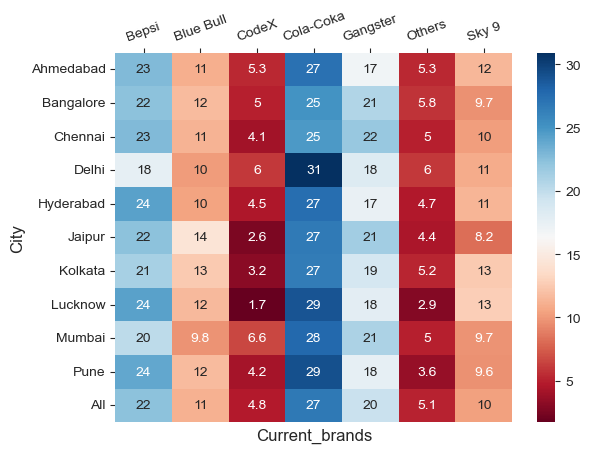

In [133]:
sns.set_style('ticks')
ax = sns.heatmap(city_brand_pivot.div(city_brand_pivot.All,axis=0).iloc[:,:-1]*100, annot=True, cmap='RdBu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='center')
ax.xaxis.tick_top()

In [87]:
# city_brand = city_brand.groupby(['City', 'Current_brands']).agg(['count'])[['Respondent_ID']]
# city_brand.reset_index(inplace=True)
# city_brand.columns = ['City', 'Current_brands', 'Count']
# #city_brand
# city_brand.head(20)
# city_brand['citywise_count'] = city_brand.groupby(['City'])['Count'].transform('sum')
# city_brand['percentage'] = np.round(100 * city_brand['Count'] / city_brand['citywise_count'], 2)
# city_brand.groupby('City').apply(lambda x:x.sort_values('percentage', ascending=False))

Major focus of improvement should be given to `Lucknow`, `Jaipur ` and `Kolkata` locations because we are bottom performers with just around 3% market value.


### 6. Purchase Behavior:
    

#### a. Where do respondents prefer to purchase energy drinks?

In [134]:
df.Purchase_location.value_counts()

Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

Many people prefer to purchase the energy drinks at`Supermarkets`

####   b. What are the typical consumption situations for energy drinks among respondents?

In [135]:
df.Typical_consumption_situations.value_counts()

Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

Larger portion of respondents prefer to consume energy drink when involved in `Sports/exercise`.

####    c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [136]:
df.Limited_edition_packaging.value_counts()

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

`Limited edition packaging` doesn't seems to be a vital factor for the respondents.

In [137]:
df.Price_range.value_counts()

50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: Price_range, dtype: int64

Many people are okay with the price range of `50-99`. the results shown suggests that if the price is higher or lower than certain margin, the product is less likely to be bought.

### 7. Product Development
  

#### a. Which area of business should we focus more on our product development? (Branding/taste/availability)

Main focus should be given to taste, followed by branding and availability.

## Secondary Insights

#### What immediate improvements can we bring to the product?

Improve the taste, branding name,logo or design and give some promotional offers.

####  What should be the ideal price of our product?

The ideal price range would be around 80

#### What kind of marketing campaigns, offers, and discounts we can run?

#### Who can be a brand ambassador, and why?

A reputed sports athlete, who is admired by the youth age group will be a better option.

#### Who should be our target audience, and why?

In [206]:
df[~(df.General_perception == 'Dangerous')].Age.value_counts()

19-30    4872
15-18    1407
31-45    1089
46-65     212
65+       182
Name: Age, dtype: int64

Our target group should be people who belongs to age group of 15 to 30, because as per our survey many people who responded belongs to this category who feel its not Dangerous to consume the energy drinks.